DATA INGESTION


In [24]:
!pip install snowflake-connector-python

In [25]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
# Set up connection parameters
account = 'py15248.central-india.azure'
user = 'HARISHMITHA'
password = 'Jman@600113'
warehouse = 'COMPUTE_WH'
database = 'FINALPROJECT'
schema = 'SCHEMA_MART'
table = 'JOINALL'

# Establish connection
conn = snowflake.connector.connect(
    user=user,
    password=password,
    account=account,
    warehouse=warehouse,
    database=database,
    schema=schema
)

# Create a cursor object
cur = conn.cursor()

# Execute a query to select data from the table
cur.execute(f'SELECT * FROM FINALPROJECT.SCHEMA.MERGED_TABLE')

# Fetch the results
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Convert the result into a pandas DataFrame for easier manipulation
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EVENT_ID       1000 non-null   object        
 1   USER_ID        1000 non-null   object        
 2   GENDER         1000 non-null   object        
 3   SKILL          1000 non-null   object        
 4   DESIGNATION    1000 non-null   object        
 5   EXPERIENCE     1000 non-null   int64         
 6   EVENTNAME      1000 non-null   object        
 7   DESCRIPTION    1000 non-null   object        
 8   STARTDATE      1000 non-null   datetime64[ns]
 9   ENDDATE        1000 non-null   datetime64[ns]
 10  LOCATION       1000 non-null   object        
 11  TRAINER        1000 non-null   object        
 12  OPENINGS       1000 non-null   int64         
 13  REGISTRATIONS  1000 non-null   int64         
 14  STATUS         1000 non-null   object        
 15  NEXTEVENT      1000 no

In [28]:
df

,EVENT_ID,USER_ID,GENDER,SKILL,DESIGNATION,EXPERIENCE,EVENTNAME,DESCRIPTION,STARTDATE,ENDDATE,LOCATION,TRAINER,OPENINGS,REGISTRATIONS,STATUS,NEXTEVENT
0,6617e36bfc13ae2c53ab963d,6617dcd0fc13ae2ab5ab9b95,Female,Angular,Fullstack Engineer,9,MachineLearning,Data Science,2023-12-09 08:20:41,2023-12-17 08:20:41,tardis,Denis Wren,491,179,Completed,BigQuery
1,6617e36afc13ae2c53ab9592,6617dcd0fc13ae2ab5ab9b64,Female,Tableau,Data Engineer,4,React,Fullstack,2024-02-04 04:30:04,2024-02-06 04:30:04,gryffindor,Drusy Bousler,43,43,Completed,MongoDB
2,6617e36cfc13ae2c53ab96a3,6617dccefc13ae2ab5ab99ea,Female,Java,Fullstack Engineer,9,AWS,Data Engineering,2024-05-28 22:07:39,2024-06-03 22:07:39,gryffindor,Mahmoud Adamson,492,13,Upcoming,Looker
3,6617e36cfc13ae2c53ab96ac,6617dccffc13ae2ab5ab9a8c,Male,Angular,Fullstack Engineer,4,MongoDB,Fullstack,2023-12-11 20:46:06,2023-12-21 20:46:06,aurum,Zaneta Nast,410,187,Completed,Nodejs
4,6617e36afc13ae2c53ab95b4,6617dcd1fc13ae2ab5ab9bf7,Female,Nodejs,Fullstack Engineer,7,DeepLearning,Data Science,2024-02-05 03:54:46,2024-02-07 03:54:46,aurum,Rosalie Bodicum,267,267,Completed,Docker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6617e36cfc13ae2c53ab96aa,6617dcd1fc13ae2ab5ab9bd2,Male,Looker,Data Engineer,10,MongoDB,Fullstack,2024-03-20 13:58:35,2024-03-28 13:58:35,falcon,Andra Lodwig,499,205,Completed,Nodejs
996,6617e36bfc13ae2c53ab966a,6617dcd1fc13ae2ab5ab9bb8,Male,Postgress,Fullstack Engineer,8,Spark,Data Engineering,2024-04-20 06:57:45,2024-04-24 06:57:45,tardis,Aprilette Acheson,20,20,Upcoming,Git
997,6617e36bfc13ae2c53ab9683,6617dcd1fc13ae2ab5ab9c04,Male,Nodejs,Fullstack Engineer,8,DeepLearning,Data Science,2024-08-16 14:16:56,2024-08-22 14:16:56,jarvis,Hermine Bread,369,272,Upcoming,AWS
998,6617e36cfc13ae2c53ab96f8,6617dcd2fc13ae2ab5ab9cad,Female,Python,Data Engineer,3,Spark,Data Engineering,2024-08-10 16:22:21,2024-08-20 16:22:21,gryffindor,Fan Brooksbank,93,93,Upcoming,BigQuery


In [29]:
print(df.isnull().sum())

EVENT_ID         0
USER_ID          0
GENDER           0
SKILL            0
DESIGNATION      0
EXPERIENCE       0
EVENTNAME        0
DESCRIPTION      0
STARTDATE        0
ENDDATE          0
LOCATION         0
TRAINER          0
OPENINGS         0
REGISTRATIONS    0
STATUS           0
NEXTEVENT        0
dtype: int64


In [30]:
print(df.describe())

        EXPERIENCE                      STARTDATE  \
count  1000.000000                           1000   
mean      5.563000  2024-04-25 14:57:29.699000064   
min       1.000000            2023-11-01 02:19:05   
25%       3.000000            2024-02-09 16:36:15   
50%       6.000000            2024-04-21 00:51:15   
75%       8.000000            2024-07-16 14:27:21   
max      10.000000            2024-10-26 09:47:15   
std       2.850993                            NaN   

                             ENDDATE     OPENINGS  REGISTRATIONS  
count                           1000  1000.000000    1000.000000  
mean   2024-04-30 22:49:48.899000064   256.283000     178.791000  
min              2023-11-05 03:17:58    20.000000      10.000000  
25%              2024-02-14 11:17:32   122.750000      84.000000  
50%              2024-04-29 00:47:42   264.500000     158.500000  
75%              2024-07-20 13:23:07   370.250000     265.000000  
max              2024-11-03 10:49:18   499.000000    

EDA

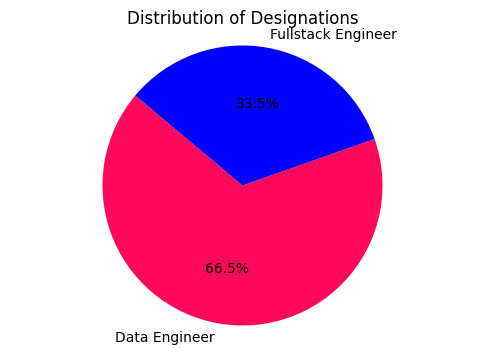

In [31]:
designation_counts = df['DESIGNATION'].value_counts()

# Define custom colors
colors = ['#FF095C', 'blue']

# Plot
plt.figure(figsize=(6, 4))
plt.pie(designation_counts, labels=designation_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Designations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

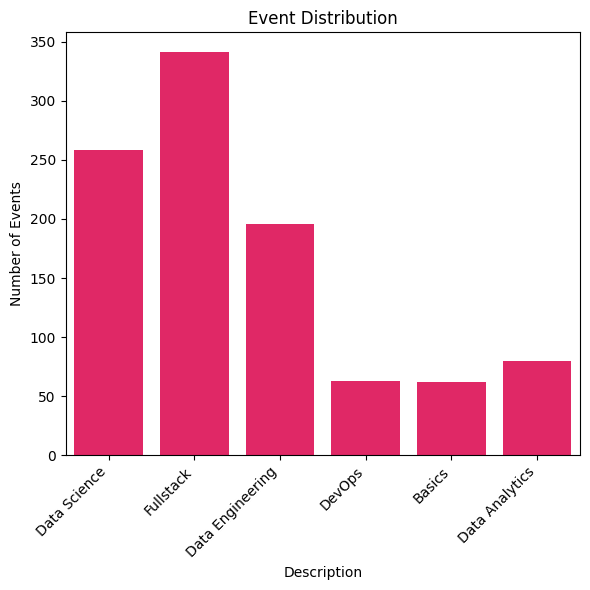

In [32]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Create the countplot
sns.countplot(data=df, x='DESCRIPTION',color='#FF095C')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Description')
plt.ylabel('Number of Events')
plt.title('Event Distribution')

# Show plot
plt.tight_layout()
plt.show()

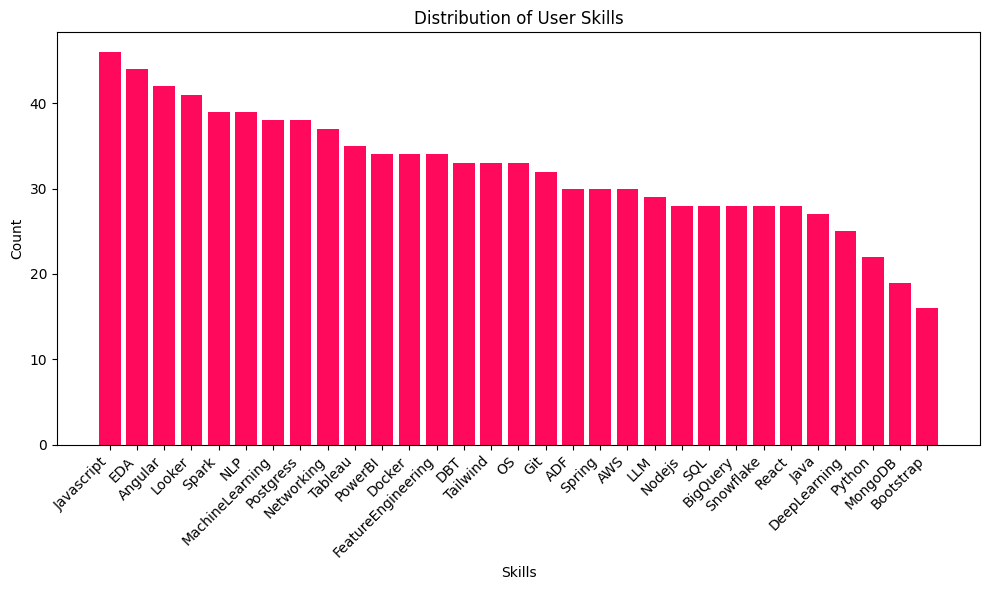

In [33]:
skill_counts = df['SKILL'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(skill_counts.index, skill_counts.values, color='#FF095C')
plt.title('Distribution of User Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

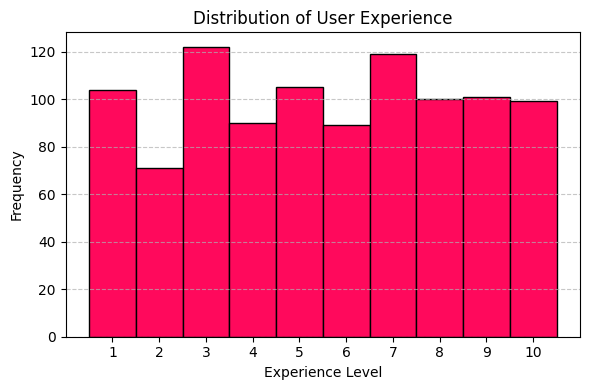

In [34]:
# Add jitter to experience levels for visualization
jittered_experience = df['EXPERIENCE'] + np.random.uniform(low=-0.3, high=0.3, size=len(df))

# Create histogram with jittered data
plt.figure(figsize=(6, 4))
plt.hist(jittered_experience, bins=np.arange(0.5, df['EXPERIENCE'].max() + 1.5, 1), color='#FF095C', edgecolor='black')
plt.title('Distribution of User Experience')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, df['EXPERIENCE'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

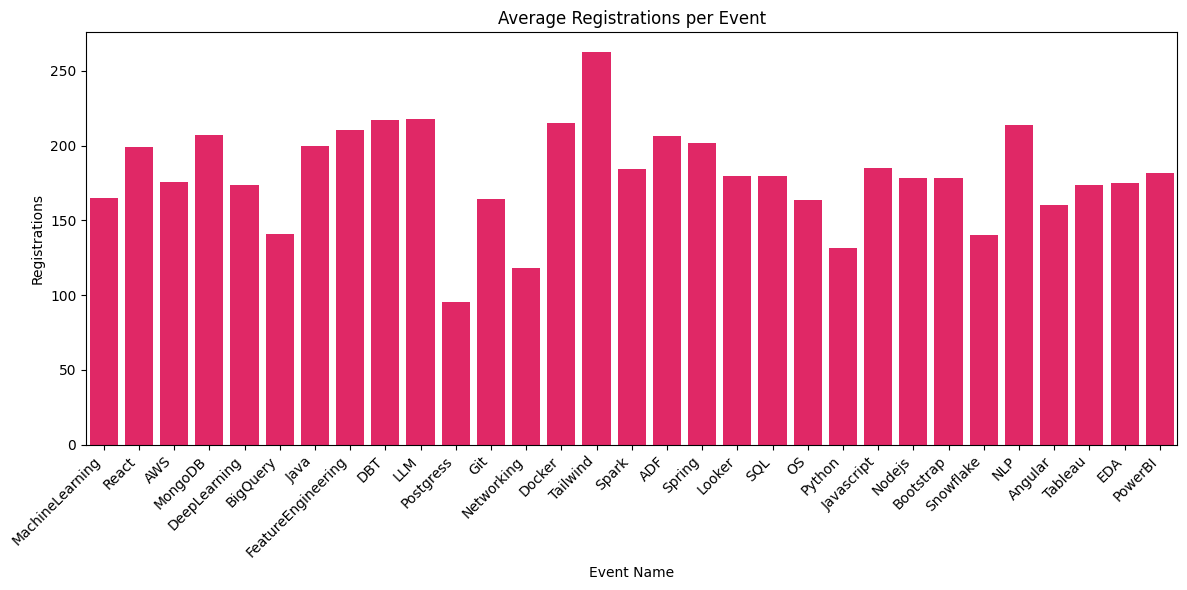

In [35]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(data=df, x='EVENTNAME', y='REGISTRATIONS', errorbar=None,color='#FF095C')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Event Name')
plt.ylabel('Registrations')
plt.title('Average Registrations per Event')

# Show plot
plt.tight_layout()
plt.show()

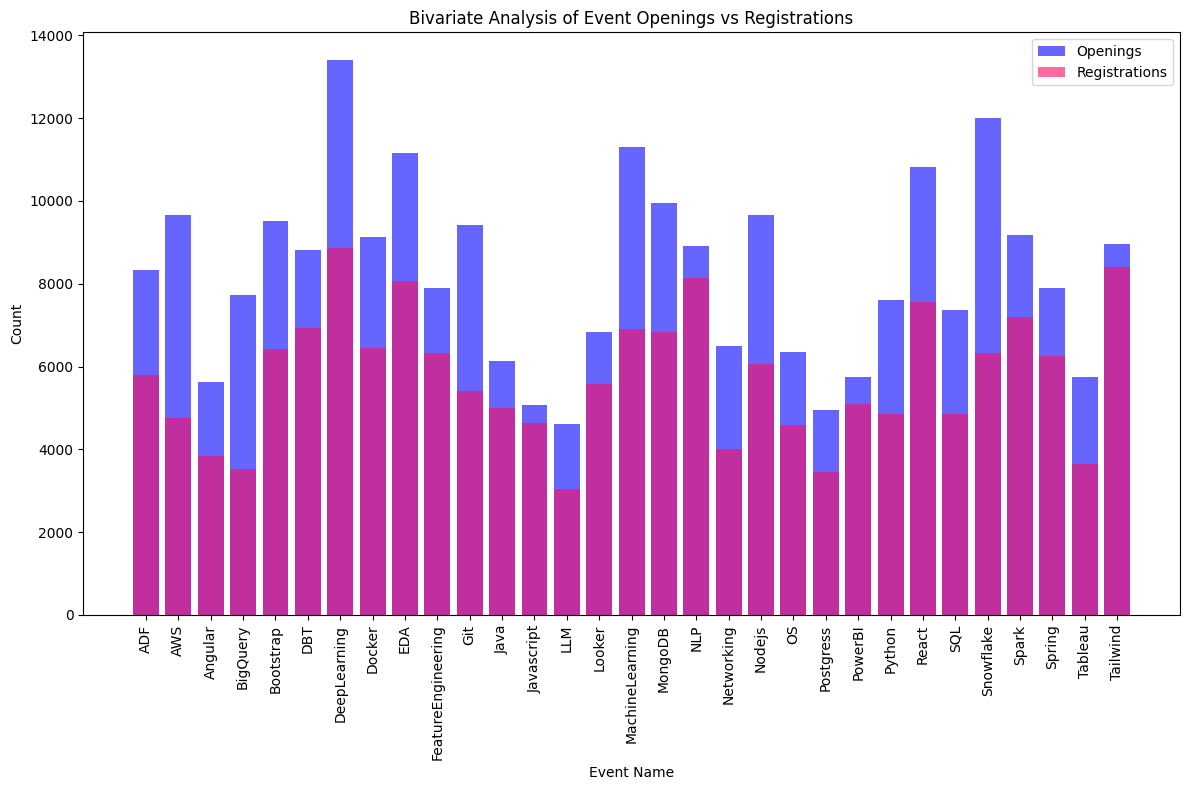

In [36]:
# Group by 'EVENTNAME' and aggregate the sum of 'OPENINGS' and 'REGISTRATIONS'
event_data = df.groupby('EVENTNAME').agg({'OPENINGS': 'sum', 'REGISTRATIONS': 'sum'}).reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart
plt.bar(event_data['EVENTNAME'], event_data['OPENINGS'], label='Openings', color='blue', alpha=0.6)
plt.bar(event_data['EVENTNAME'], event_data['REGISTRATIONS'], label='Registrations', color='#FF095C', alpha=0.6)

# Add labels and title
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Bivariate Analysis of Event Openings vs Registrations')
plt.xticks(rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


FEATURE ENGINEERING


In [37]:
df['DURATION'] = (df['ENDDATE'] - df['STARTDATE'])

# Extract only the number of days from the timedelta and assign it back to 'DURATION'
df['DURATION'] = df['DURATION'].dt.days

# df['STARTDATE'] = pd.to_datetime(df['STARTDATE'])
# df['ENDDATE'] = pd.to_datetime(df['ENDDATE'])

# # Splitting start date into individual components
# df['START_YEAR'] = df['STARTDATE'].dt.year
# df['START_MONTH'] = df['STARTDATE'].dt.month
# df['START_DAY'] = df['STARTDATE'].dt.day
# df['START_HOUR'] = df['STARTDATE'].dt.hour
# df['START_MINUTE'] = df['STARTDATE'].dt.minute
# df['START_SECOND'] = df['STARTDATE'].dt.second

# # Splitting end date into individual components
# df['END_YEAR'] = df['ENDDATE'].dt.year
# df['END_MONTH'] = df['ENDDATE'].dt.month
# df['END_DAY'] = df['ENDDATE'].dt.day
# df['END_HOUR'] = df['ENDDATE'].dt.hour
# df['END_MINUTE'] = df['ENDDATE'].dt.minute
# df['END_SECOND'] = df['ENDDATE'].dt.second

df = df.drop(columns=['EVENT_ID','STATUS','STARTDATE','ENDDATE'])


In [38]:
# Convert integer values to strings in the SKILL and EVENTNAME columns
df['SKILL'] = df['SKILL'].astype(str)
df['EVENTNAME'] = df['EVENTNAME'].astype(str)

# Group by USER_ID and aggregate SKILL and EVENTNAME columns
df_grouped = df.groupby('USER_ID').agg(lambda x: '|'.join(set(str(val) for val in x)))
#print(df_grouped)

# Function to encode skills and events attended
def encode_skills_events(row):
    skills_events = set(row['SKILL'].split('|') + row['EVENTNAME'].split('|'))
    encoded_skills_events = {skill_event: 1 if skill_event in skills_events else 0 for skill_event in all_skills_events}
    return pd.Series(encoded_skills_events).fillna(0)  # Fill NaN values with 0


# Get all unique skills and event names
all_skills_events = set('|'.join(df_grouped['SKILL']).split('|') + '|'.join(df_grouped['EVENTNAME']).split('|'))
#print(all_skills_events)

# Apply encoding function to each row
encoded_df = df_grouped.apply(encode_skills_events, axis=1)
#print(encoded_df)

# Merge final_df with the original DataFrame df on the USER_ID column
merged_df = df.merge(encoded_df, on='USER_ID')

# Display the merged DataFrame
merged_df=merged_df.drop(columns=['SKILL','EVENTNAME'])



In [39]:
from scipy.stats import chi2_contingency

# Selecting only the categorical variables
categorical_vars = merged_df.select_dtypes(include=['object', 'bool'])

# Target variable
target_variable = 'NEXTEVENT'

# Create an empty dictionary to store the results
chi_square_results = {}

# Iterate over each categorical variable
for column in categorical_vars:
    # Skip the target variable itself
    if column == target_variable:
        continue

    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df[target_variable])

    # Apply the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    chi_square_results[column] = {'Chi-square': chi2, 'P-value': p_value}

# Print the results
for variable, results in chi_square_results.items():
    print(f"Chi-square test results for {variable} against {target_variable}:")
    print(results)
    print()


Chi-square test results for USER_ID against NEXTEVENT:
{'Chi-square': 15968.449570083003, 'P-value': 0.9565309759519232}

Chi-square test results for GENDER against NEXTEVENT:
{'Chi-square': 31.950797640363472, 'P-value': 0.19475339607870268}

Chi-square test results for DESIGNATION against NEXTEVENT:
{'Chi-square': 32.95382292740549, 'P-value': 0.16344189741481593}

Chi-square test results for DESCRIPTION against NEXTEVENT:
{'Chi-square': 1962.9967319210534, 'P-value': 0.0}

Chi-square test results for LOCATION against NEXTEVENT:
{'Chi-square': 264.7827741268653, 'P-value': 5.437843006562524e-16}

Chi-square test results for TRAINER against NEXTEVENT:
{'Chi-square': 26000.0, 'P-value': 0.0}



In [40]:
#merged_df

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['USER_ID', 'GENDER', 'DESIGNATION', 'DESCRIPTION', 'LOCATION', 'TRAINER', 'NEXTEVENT']

# Create a dictionary to store mappings
#encoded_mappings = {}

# Apply label encoding to each column and store mappings
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])
    # encoded_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# # Print the encoded values for each category
# for column, mapping in encoded_mappings.items():
#     print(f"Encoded values for '{column}':")
#     for category, encoded_value in mapping.items():
#         print(f"{category}: {encoded_value}")
#     print()

# Encoded values for 'GENDER':
# Female: 0
# Male: 1

# Encoded values for 'DESIGNATION':
# Data Engineer: 0
# Fullstack Engineer: 1

# Encoded values for 'DESCRIPTION':
# Basics: 0
# Data Analytics: 1
# Data Engineering: 2
# Data Science: 3
# DevOps: 4
# Fullstack: 5

# Encoded values for 'LOCATION':
# aurum: 0
# falcon: 1
# gryffindor: 2
# jarvis: 3
# tardis: 4


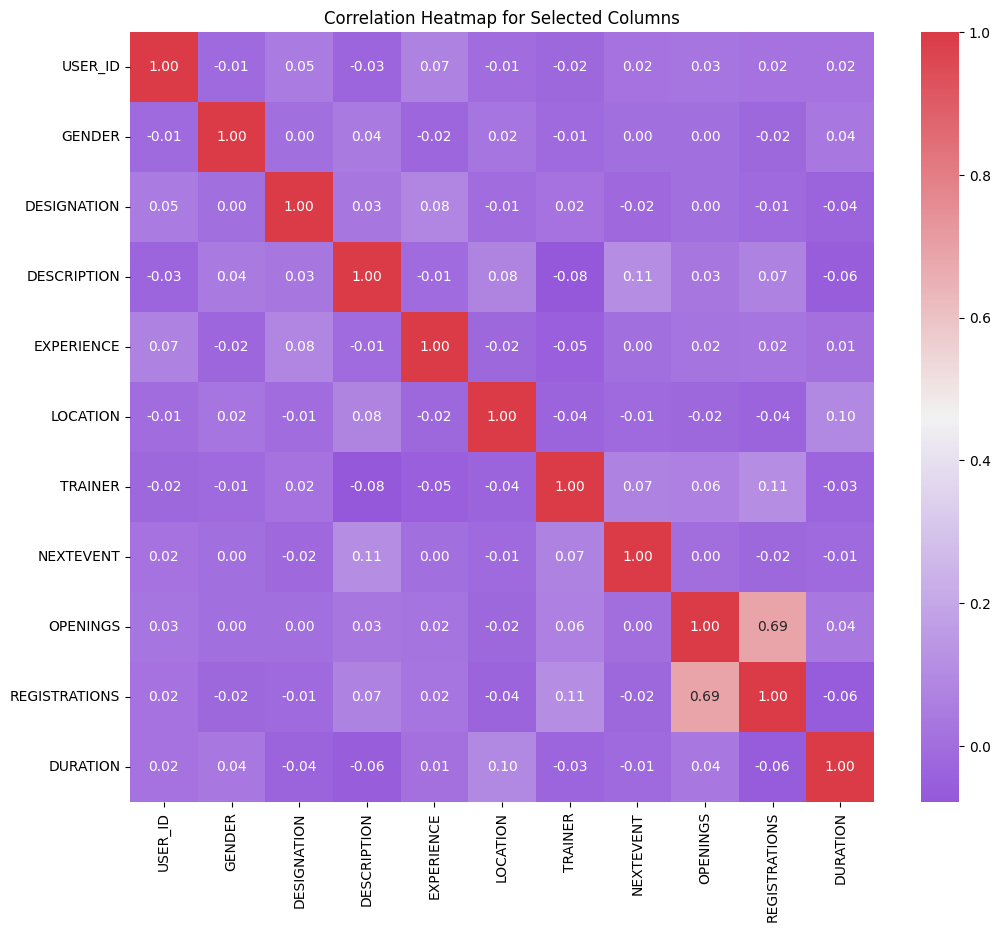

In [42]:
# Select only the specified columns
selected_columns = ['USER_ID', 'GENDER', 'DESIGNATION', 'DESCRIPTION','EXPERIENCE','LOCATION', 'TRAINER', 'NEXTEVENT','OPENINGS','REGISTRATIONS','DURATION']
selected_df = merged_df[selected_columns]

#,'START_DAY','START_HOUR','START_MINUTE','START_SECOND','END_YEAR','END_MONTH','END_DAY','END_HOUR','END_MINUTE','END_SECOND'

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap with specified colors
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(280, 10, as_cmap=True), fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

<ipython-input-43-6d42ab46059f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlation_with_next_event.values, x=correlation_with_next_event.index, palette=['#FF095C'])
<ipython-input-43-6d42ab46059f>:9: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=correlation_with_next_event.values, x=correlation_with_next_event.index, palette=['#FF095C'])


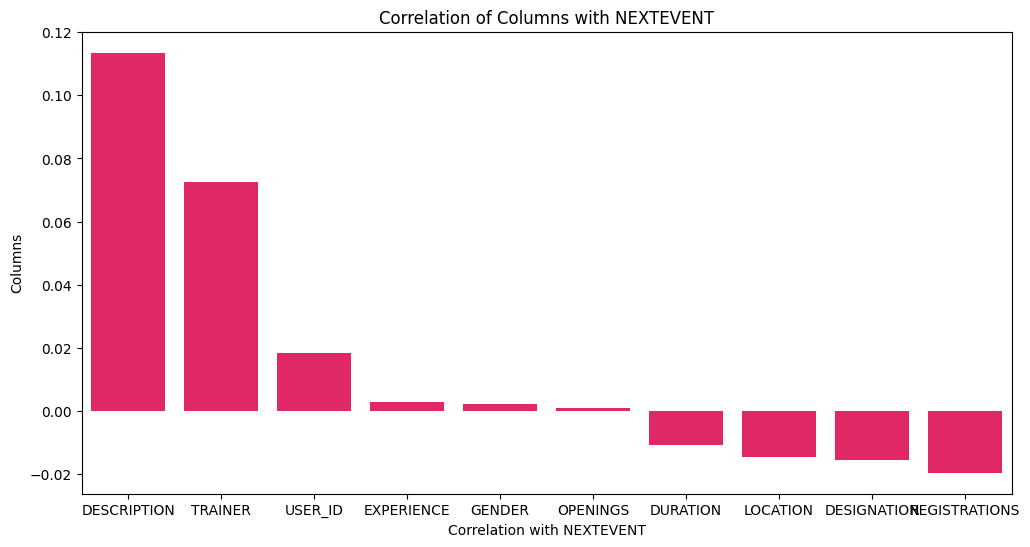

In [43]:
# Select columns to include in the correlation analysis
columns_to_include = ['USER_ID', 'GENDER', 'DESIGNATION', 'DESCRIPTION','EXPERIENCE','LOCATION', 'TRAINER','OPENINGS','REGISTRATIONS','DURATION']

# Calculate correlation of selected columns with 'NEXTEVENT'
correlation_with_next_event = merged_df[columns_to_include].corrwith(merged_df['NEXTEVENT']).sort_values(ascending=False)

# Plot horizontal bar graph with specified colors
plt.figure(figsize=(12, 6))
sns.barplot(y=correlation_with_next_event.values, x=correlation_with_next_event.index, palette=['#FF095C'])
plt.xlabel('Correlation with NEXTEVENT')
plt.ylabel('Columns')
plt.title('Correlation of Columns with NEXTEVENT')
plt.show()

In [44]:
print(merged_df.columns)
merged_df.to_csv('merged_data.csv', index=False)

Index(['USER_ID', 'GENDER', 'DESIGNATION', 'EXPERIENCE', 'DESCRIPTION',
       'LOCATION', 'TRAINER', 'OPENINGS', 'REGISTRATIONS', 'NEXTEVENT',
       'DURATION', 'MachineLearning', 'FeatureEngineering', 'Java',
       'Javascript', 'LLM', 'ADF', 'MongoDB', 'AWS', 'Spring', 'Snowflake',
       'DeepLearning', 'React', 'PowerBI', 'Angular', 'Tailwind', 'SQL', 'EDA',
       'Docker', 'NLP', 'Spark', 'Python', 'Bootstrap', 'Looker', 'DBT', 'OS',
       'Git', 'BigQuery', 'Tableau', 'Nodejs', 'Postgress', 'Networking'],
      dtype='object')


In [49]:
#RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Remove 'NEXTEVENT' column from features
X = merged_df.drop(columns=['USER_ID', 'GENDER','EXPERIENCE', 'REGISTRATIONS', 'NEXTEVENT','OPENINGS'])

# Define target variable
y = merged_df['NEXTEVENT']

# Encode categorical variables
X = pd.get_dummies(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the new data in a dictionary format
new_data = {
    'DESIGNATION': [1],
    'DESCRIPTION': [5],
    'LOCATION': [2],
    'TRAINER': [100],
    'DURATION': [8],
    'MachineLearning': [0],
    'FeatureEngineering': [0],
    'Java': [0],
    'Javascript': [0],
    'LLM': [0],
    'ADF': [0],
    'MongoDB': [0],
    'AWS': [0],
    'Spring': [0],
    'Snowflake': [0],
    'DeepLearning': [0],
    'React': [0],
    'PowerBI': [0],
    'Angular': [0],
    'Tailwind': [0],
    'SQL': [0],
    'EDA': [0],
    'Docker': [0],
    'NLP': [0],
    'Spark': [0],
    'Python': [0],
    'Bootstrap': [0],
    'Looker': [0],
    'DBT': [0],
    'OS': [0],
    'Git': [0],
    'BigQuery': [0],
    'Tableau': [0],
    'Nodejs': [0],
    'Postgress': [0],
    'Networking': [0]
}
# Create a DataFrame from the new data
new_df = pd.DataFrame(new_data)

# Encode categorical variables using one-hot encoding
new_df_encoded = pd.get_dummies(new_df)

# Use the trained Random Forest classifier (clf) to make predictions on the new data
predicted_event_numbers = clf.predict(new_df_encoded)

# Map predicted event numbers back to event names using the LabelEncoder
predicted_event_names = label_encoder.inverse_transform(predicted_event_numbers)

# Print the predicted next event names
print("Predicted Next Event Names:", predicted_event_names)



Accuracy: 0.505
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.45      0.43      0.44        21
           2       0.50      0.50      0.50         2
           3       0.57      0.40      0.47        10
           4       0.90      0.75      0.82        12
           5       0.33      0.14      0.20         7
           6       0.58      0.47      0.52        15
           7       0.50      0.50      0.50         2
           9       0.35      0.47      0.40        15
          10       0.61      0.69      0.65        16
          11       1.00      0.33      0.50         3
          12       0.33      0.25      0.29        12
          13       0.50      0.50      0.50         2
          14       0.38      0.60      0.46         5
          15       1.00      0.50      0.67         2
          16       0.77      0.83      0.80        12
          17       0.71      0.83      0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove 'NEXTEVENT' column from features
X = merged_df.drop(columns=['USER_ID', 'GENDER','EXPERIENCE', 'REGISTRATIONS', 'NEXTEVENT','OPENINGS'])

# Define target variable
y = merged_df['NEXTEVENT']

# Encode categorical variables
X = pd.get_dummies(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
k = 5  # Specify the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Model Evaluation
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the new data in a dictionary format
new_data = {
    'DESIGNATION': [1],
    'DESCRIPTION': [5],
    'LOCATION': [2],
    'TRAINER': [100],
    'DURATION': [8],
    'MachineLearning': [0],
    'FeatureEngineering': [0],
    'Java': [0],
    'Javascript': [0],
    'LLM': [0],
    'ADF': [0],
    'MongoDB': [0],
    'AWS': [0],
    'Spring': [0],
    'Snowflake': [0],
    'DeepLearning': [0],
    'React': [0],
    'PowerBI': [0],
    'Angular': [0],
    'Tailwind': [0],
    'SQL': [0],
    'EDA': [0],
    'Docker': [0],
    'NLP': [0],
    'Spark': [0],
    'Python': [0],
    'Bootstrap': [0],
    'Looker': [0],
    'DBT': [0],
    'OS': [0],
    'Git': [0],
    'BigQuery': [0],
    'Tableau': [0],
    'Nodejs': [0],
    'Postgress': [0],
    'Networking': [0]
}
# Create a DataFrame from the new data
new_df = pd.DataFrame(new_data)

# Encode categorical variables using one-hot encoding
new_df_encoded = pd.get_dummies(new_df)

# Use the trained KNN classifier (knn) to make predictions on the new data
predicted_event_numbers = knn.predict(new_df_encoded)

# Map predicted event numbers back to event names using the LabelEncoder
predicted_event_names = label_encoder.inverse_transform(predicted_event_numbers)

# Print the predicted next event names
print("Predicted Next Event Names:", predicted_event_names)



Accuracy: 0.375
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.17      0.14        12
           1       0.57      0.62      0.59        21
           2       0.14      0.50      0.22         2
           3       0.17      0.10      0.12        10
           4       0.47      0.58      0.52        12
           5       0.29      0.29      0.29         7
           6       0.73      0.53      0.62        15
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         0
           9       0.40      0.40      0.40        15
          10       0.44      0.50      0.47        16
          11       0.00      0.00      0.00         3
          12       0.45      0.42      0.43        12
          13       0.25      0.50      0.33         2
          14       0.67      0.80      0.73         5
          15       0.00      0.00      0.00         2
          16       0.27      0.33      0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [51]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Remove 'NEXTEVENT' column from features
X = merged_df.drop(columns=['USER_ID', 'GENDER',  'EXPERIENCE','OPENINGS','REGISTRATIONS', 'NEXTEVENT'])

# Define target variable
y = merged_df['NEXTEVENT']

# Encode categorical variables
X = pd.get_dummies(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Model Evaluation
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the new data in a dictionary format
new_data = {
    'DESIGNATION': [1],
    'DESCRIPTION': [5],
    'LOCATION': [2],
    'TRAINER': [100],
    'DURATION': [8],
    'MachineLearning': [0],
    'FeatureEngineering': [0],
    'Java': [0],
    'Javascript': [0],
    'LLM': [0],
    'ADF': [0],
    'MongoDB': [0],
    'AWS': [0],
    'Spring': [0],
    'Snowflake': [0],
    'DeepLearning': [0],
    'React': [0],
    'PowerBI': [0],
    'Angular': [0],
    'Tailwind': [0],
    'SQL': [0],
    'EDA': [0],
    'Docker': [0],
    'NLP': [0],
    'Spark': [0],
    'Python': [0],
    'Bootstrap': [0],
    'Looker': [0],
    'DBT': [0],
    'OS': [0],
    'Git': [0],
    'BigQuery': [0],
    'Tableau': [0],
    'Nodejs': [0],
    'Postgress': [0],
    'Networking': [0]
}# Create a DataFrame from the new data
new_df = pd.DataFrame(new_data)

# Encode categorical variables using one-hot encoding
new_df_encoded = pd.get_dummies(new_df)

# Use the trained (clf) to make predictions on the new data
predicted_event_numbers = svm_clf.predict(new_df_encoded)

# Map predicted event numbers back to event names using the LabelEncoder
predicted_event_names = label_encoder.inverse_transform(predicted_event_numbers)

# Print the predicted next event names
print("Predicted Next Event Names:", predicted_event_names)


Accuracy: 0.305
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.08      0.09        12
           1       0.18      0.14      0.16        21
           2       0.33      0.50      0.40         2
           3       0.18      0.20      0.19        10
           4       0.78      0.58      0.67        12
           5       0.00      0.00      0.00         7
           6       0.18      0.13      0.15        15
           7       1.00      1.00      1.00         2
           9       0.11      0.13      0.12        15
          10       0.67      0.62      0.65        16
          11       0.00      0.00      0.00         3
          12       0.30      0.25      0.27        12
          13       0.25      0.50      0.33         2
          14       0.43      0.60      0.50         5
          15       1.00      0.50      0.67         2
          16       0.73      0.67      0.70        12
          17       0.62      0.83      0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = merged_df.drop(columns=['USER_ID', 'GENDER',  'EXPERIENCE','OPENINGS', 'REGISTRATIONS', 'NEXTEVENT'])
y = merged_df['NEXTEVENT']

# Encode categorical variables
X = pd.get_dummies(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier (XGBoost)
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_clf.predict(X_test)

# Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# Classification Report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb,zero_division=1))

# Define the new data in a dictionary format
new_data = {
    'DESIGNATION': [1],
    'DESCRIPTION': [5],
    'LOCATION': [2],
    'TRAINER': [100],
    'DURATION': [8],
    'MachineLearning': [0],
    'FeatureEngineering': [0],
    'Java': [0],
    'Javascript': [0],
    'LLM': [0],
    'ADF': [0],
    'MongoDB': [0],
    'AWS': [0],
    'Spring': [0],
    'Snowflake': [0],
    'DeepLearning': [0],
    'React': [0],
    'PowerBI': [0],
    'Angular': [0],
    'Tailwind': [0],
    'SQL': [0],
    'EDA': [0],
    'Docker': [0],
    'NLP': [0],
    'Spark': [0],
    'Python': [0],
    'Bootstrap': [0],
    'Looker': [0],
    'DBT': [0],
    'OS': [0],
    'Git': [0],
    'BigQuery': [0],
    'Tableau': [0],
    'Nodejs': [0],
    'Postgress': [0],
    'Networking': [0]
}# Create a DataFrame from the new data
new_df = pd.DataFrame(new_data)
#Encode categorical variables using one-hot encoding
new_df_encoded = pd.get_dummies(new_df)

#Print the new DataFrame
#print("New DataFrame for prediction:")
#print(new_df_encoded)

# Use the trained (clf) to make predictions on the new data
predicted_event_numbers = gb_clf.predict(new_df_encoded)

# Map predicted event numbers back to event names using the LabelEncoder
predicted_event_names = label_encoder.inverse_transform(predicted_event_numbers)

# Print the predicted next event names
print("Predicted Next Event Names:", predicted_event_names)


Accuracy (Gradient Boosting): 0.605
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.27      0.25      0.26        12
           1       0.62      0.71      0.67        21
           2       0.50      0.50      0.50         2
           3       0.50      0.30      0.37        10
           4       1.00      0.67      0.80        12
           5       0.40      0.29      0.33         7
           6       0.63      0.80      0.71        15
           7       0.00      0.00      0.00         2
           8       0.00      1.00      0.00         0
           9       0.47      0.47      0.47        15
          10       0.69      0.69      0.69        16
          11       1.00      0.67      0.80         3
          12       0.67      0.67      0.67        12
          13       0.50      1.00      0.67         2
          14       0.60      0.60      0.60         5
          15       1.00      0.00      0.00         2
  

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load the merged_df from CSV file
merged_df = pd.read_csv('merged_data.csv')

# Define the target variable
target_column = 'NEXTEVENT'

# Remove the target column from features
X = merged_df.drop(columns=[target_column, 'USER_ID', 'GENDER', 'OPENINGS','REGISTRATIONS', 'EXPERIENCE','NEXTEVENT'])

# Define the new data for recommendation
new_data = {
    'DESIGNATION': [1],
    'DESCRIPTION': [5],
    'LOCATION': [2],
    'TRAINER': [100],
    'DURATION': [8],
    'MachineLearning': [0],
    'FeatureEngineering': [0],
    'Java': [0],
    'Javascript': [0],
    'LLM': [0],
    'ADF': [0],
    'MongoDB': [0],
    'AWS': [0],
    'Spring': [0],
    'Snowflake': [0],
    'DeepLearning': [0],
    'React': [0],
    'PowerBI': [0],
    'Angular': [0],
    'Tailwind': [0],
    'SQL': [0],
    'EDA': [0],
    'Docker': [0],
    'NLP': [0],
    'Spark': [0],
    'Python': [0],
    'Bootstrap': [0],
    'Looker': [0],
    'DBT': [0],
    'OS': [0],
    'Git': [0],
    'BigQuery': [0],
    'Tableau': [0],
    'Nodejs': [0],
    'Postgress': [0],
    'Networking': [0]
}
# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data)

# Compute cosine similarity
cosine_sim = cosine_similarity(X, new_df)

# Flatten the cosine similarity array
cosine_sim_flat = cosine_sim.flatten()

# Find the indices of the top recommended events
top_event_indices = cosine_sim_flat.argsort()[::-1][:5]  # Getting the indices of the top 5 recommended events

# Initialize LabelEncoder for the 'NEXTEVENT' column
event_label_encoder = LabelEncoder()
event_label_encoder.fit(merged_df['NEXTEVENT'])

# Use inverse_transform to map the recommended event numbers back to event names
recommended_event_names = label_encoder.inverse_transform(merged_df.loc[top_event_indices, target_column])

# Print the recommended events and their similarity scores
print("Top Recommended Events:")
for event_name, similarity_score in zip(recommended_event_names, cosine_sim_flat[top_event_indices]):
    print(f"Event: {event_name}, Similarity Score: {similarity_score}")


Top Recommended Events:
Event: PowerBI, Similarity Score: 0.9998134078036831
Event: Nodejs, Similarity Score: 0.9998121991754212
Event: Nodejs, Similarity Score: 0.9998121991754212
Event: ADF, Similarity Score: 0.9998061139015618
Event: Spring, Similarity Score: 0.9997662856415916
